# Modeling

Let $i,j \in [1,10]$, $x_{i,j} \in {0,1}$ represent the couple of man $i$ and woman $j$, and $x_{i,j} = 1$ if the couple is in the matching, $0$ otherwise.  Then we have the following constraints to ensure that each person only appears once and men are only matched to women:
$$\sum_{j=1}^{10} x_{ij} = 1 \qquad i\in[1,10]$$
$$\sum_{i=1}^{10} x_{ij} = 1 \qquad j\in[1,10]$$
Learning the result of a truth booth adds a constraint of the form $x_{ij} = b$ where $b\in{0,1}$ reflects the outcome of the Truth Booth.  Learning that a matching ceremony in which $(i_1,j_1),\ldots,(i_{10},j_{10})$ were matched had $k$ matches adds a constraint of the form 
$$x_{i_1,j_1} + \cdots + x_{i_{10},j_{10}} = k$$

We can score how well the contestants are making choices by evaluating how much a given truth booth or matching ceremony pares down the solution space.  

Let $V$ denote the set of valid matches satisfying the constraints thus far and let $\text{TB}(i,j)$ tell us the truth booth outcome.  Then the best couple to send to the truth booth is the one:
$$(i,j) = \arg\min_{i,j} \mathbb{E}_b [|\{M \in V \mid \text{TB}(i,j) = b\}|]$$
Similarly, we can choose the couples we send to ceremony.  The outcome of the ceremony is the number of lights, $k$.  Let $\ell(m|v)$ be the number of lights that a matching $m$ gets if $v$ is the perfect matching.

# Imports

In [1]:
from areyoutheone import AreYouTheOne

%load_ext autoreload
%autoreload 2

# Model Setup

In [2]:
men = ["Alec", "Austin", "Chuck", "Connor", "Devin", "Hunter", "Mike", "Nelson", "Tyler", "Zak"]
women = ["Amanda", "Britni", "Chelsey", "Cheyenne", "Hannah", "Kayla", "Kiki", "Melanie", "Rashida", "Stacey"]

model = AreYouTheOne(men, women)

# Week 1

*warning: solver in week 1 will take a couple minutes given how few constraints we have*

In [3]:
matchups_w1 = [
    ("Alec", "Stacey"),
    ("Austin", "Kiki"),
    ("Chuck", "Hannah"),
    ("Connor", "Chelsey"),
    ("Devin", "Melanie"),
    ("Hunter", "Britni"),
    ("Mike", "Amanda"),
    ("Nelson", "Cheyenne"),
    ("Tyler", "Rashida"),
    ("Zak", "Kayla")
]
model.add_matching_ceremony(2, matchups_w1)
model.add_truth_booth("Hunter", "Kiki", False)

100000
200000
300000
400000
500000
600000


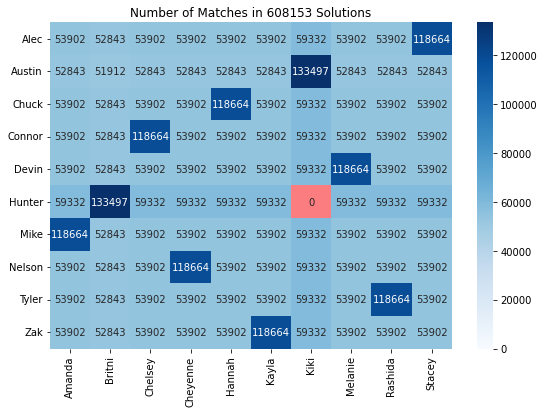

In [4]:
counts_w1 = model.solve(print_every=100000)
model.display()

# Week 2

In [5]:
matchups_w2 = [
    ("Alec", "Chelsey"),
    ("Austin", "Kiki"),
    ("Chuck", "Hannah"),
    ("Connor", "Kayla"),
    ("Devin", "Melanie"),
    ("Hunter", "Stacey"),
    ("Mike", "Amanda"),
    ("Nelson", "Cheyenne"),
    ("Tyler", "Rashida"),
    ("Zak", "Britni")
]
model.add_matching_ceremony(0, matchups_w2)
model.add_truth_booth("Devin", "Kiki", False)

10000
20000
30000
40000
50000
60000


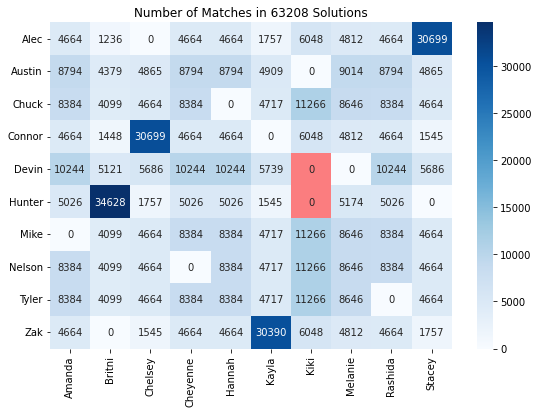

In [6]:
model.solve(print_every=10000)
model.display()

# Week 3

In [7]:
matchups_w3 = [
    ("Alec", "Stacey"),
    ("Austin", "Amanda"),
    ("Chuck", "Kiki"),
    ("Connor", "Chelsey"),
    ("Devin", "Rashida"),
    ("Hunter", "Britni"),
    ("Mike", "Kayla"),
    ("Nelson", "Melanie"),
    ("Tyler", "Cheyenne"),
    ("Zak", "Hannah")
]
model.add_matching_ceremony(3, matchups_w3)
model.add_truth_booth("Zak", "Kiki", False)

3000
6000
9000
12000


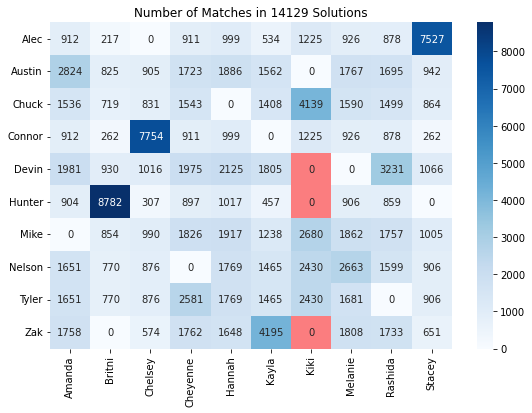

In [8]:
model.solve(print_every=3000)
model.display()

# Week 4

In [9]:
model.add_truth_booth("Chuck", "Britni", False)

In [10]:
matchups_w4 = [
    ("Alec", "Amanda"),
    ("Austin", "Stacey"),
    ("Chuck", "Kiki"),
    ("Connor", "Chelsey"),
    ("Devin", "Hannah"),
    ("Hunter", "Rashida"),
    ("Mike", "Kayla"),
    ("Nelson", "Britni"),
    ("Tyler", "Melanie"),
    ("Zak", "Cheyenne")
]
model.add_matching_ceremony(2, matchups_w4)

1000
2000
3000


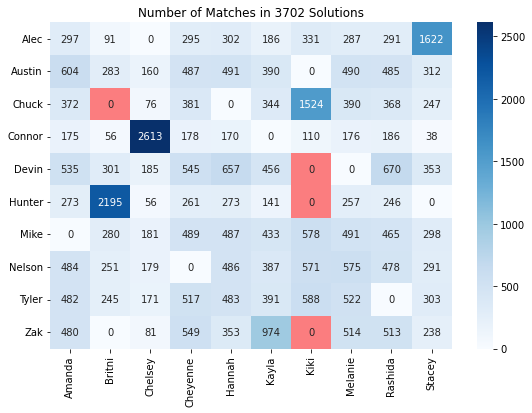

In [11]:
model.solve(print_every=1000)
model.display()

# Week 5

In [12]:
model.min_expected_truth_booth([
    ("Connor", "Chelsey"),
    ("Nelson", "Rashida")
])

{('Connor', 'Chelsey'): 2164.6920583468395, ('Nelson', 'Rashida'): 2869.4381415451107}


('Connor', 'Chelsey')

In [13]:
model.add_truth_booth("Connor", "Chelsey", True)

In [14]:
matchups_w5 = [
    ("Alec", "Stacey"),
    ("Austin", "Hannah"),
    ("Chuck", "Kiki"),
    ("Connor", "Chelsey"),
    ("Devin", "Cheyenne"),
    ("Hunter", "Melanie"),
    ("Mike", "Britni"),
    ("Nelson", "Rashida"),
    ("Tyler", "Amanda"),
    ("Zak", "Kayla")
]
model.add_matching_ceremony(2, matchups_w5)

200
400
600
800


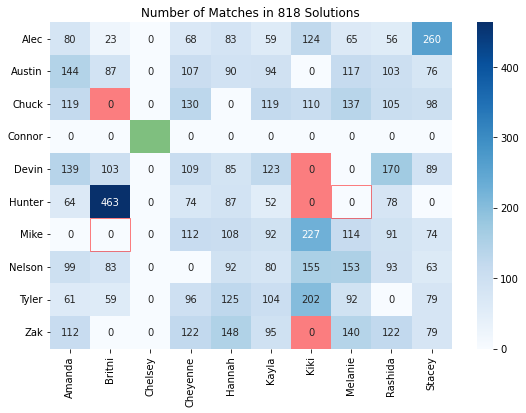

In [15]:
counts_w5_2 = model.solve(print_every=200)
model.display()

# Week 6

In [16]:
model.min_expected_truth_booth([
    ("Austin", "Cheyenne"),
    ("Chuck", "Kiki")
])
model.add_truth_booth("Chuck", "Kiki", False)

{('Austin', 'Cheyenne'): 631.9926650366748, ('Chuck', 'Kiki'): 627.5843520782396}


200
400
600


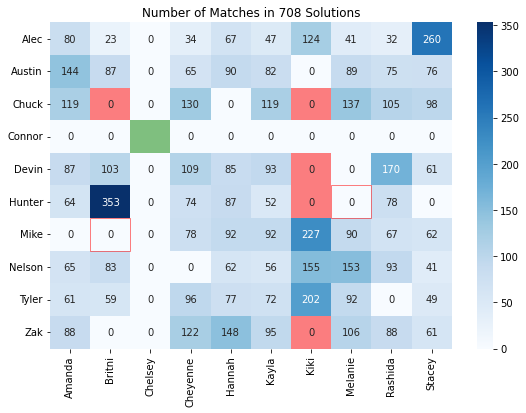

In [17]:
model.solve(print_every=200)
model.display()

In [18]:
matchups_w6 = [
    ("Alec", "Stacey"),
    ("Austin", "Cheyenne"),
    ("Chuck", "Amanda"),
    ("Connor", "Chelsey"),
    ("Devin", "Rashida"),
    ("Hunter", "Britni"),
    ("Mike", "Melanie"),
    ("Nelson", "Kiki"),
    ("Tyler", "Hannah"),
    ("Zak", "Kayla")
]
model.add_matching_ceremony(3, matchups_w6)

100
200


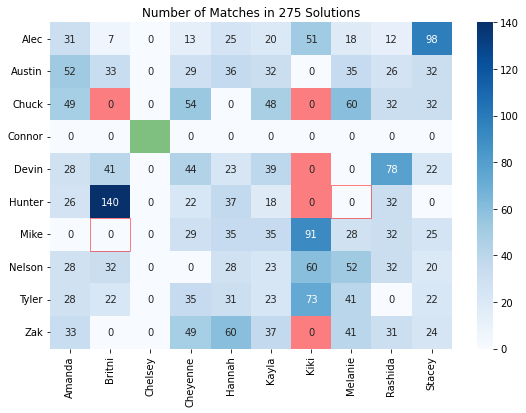

In [19]:
model.solve()
model.display()

# Week 7

In [20]:
model.min_expected_truth_booth([
    ("Alec", "Melanie"),
    ("Hunter", "Rashida")
])

{('Alec', 'Melanie'): 241.35636363636365, ('Hunter', 'Rashida'): 218.44727272727272}


('Hunter', 'Rashida')

100
200


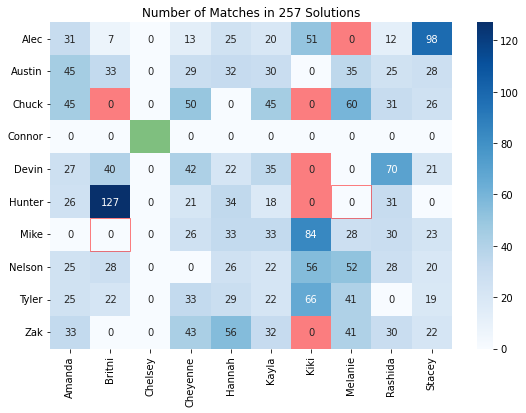

In [21]:
model.add_truth_booth("Alec", "Melanie", False)
model.solve()
model.display()

In [22]:
matchups_w7 = [
    ("Alec", "Rashida"),
    ("Austin", "Kayla"),
    ("Chuck", "Melanie"),
    ("Connor", "Chelsey"),
    ("Devin", "Britni"),
    ("Hunter", "Amanda"),
    ("Mike", "Stacey"),
    ("Nelson", "Kiki"),
    ("Tyler", "Cheyenne"),
    ("Zak", "Hannah")
]
model.add_matching_ceremony(3, matchups_w7)

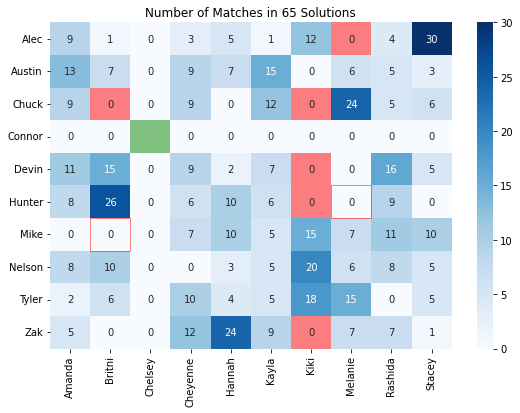

In [23]:
model.solve()
model.display()

# Week 8 

In [24]:
model.min_expected_truth_booth([
    ("Austin", "Kayla"),
    ("Hunter", "Amanda"),
    ("Nelson", "Kiki")
])

{('Austin', 'Kayla'): 41.92307692307692, ('Hunter', 'Amanda'): 50.96923076923076, ('Nelson', 'Kiki'): 37.30769230769231}


('Nelson', 'Kiki')

In [25]:
model.add_truth_booth("Nelson", "Kiki", False)

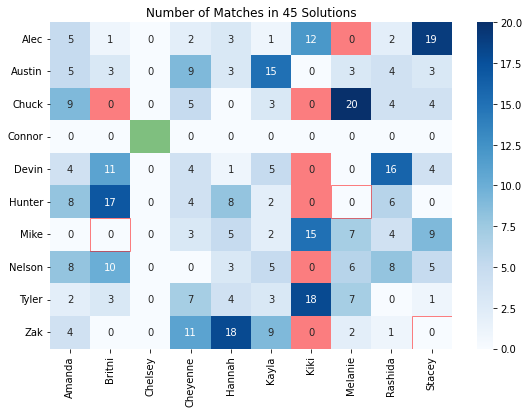

In [26]:
model.solve()
model.display()

In [27]:
matchups_w8 = [
    ("Alec", "Stacey"),
    ("Austin", "Kiki"),
    ("Chuck", "Amanda"),
    ("Connor", "Chelsey"),
    ("Devin", "Rashida"),
    ("Hunter", "Britni"),
    ("Mike", "Melanie"),
    ("Nelson", "Kayla"),
    ("Tyler", "Cheyenne"),
    ("Zak", "Hannah")
]
model.add_matching_ceremony(3, matchups_w8)

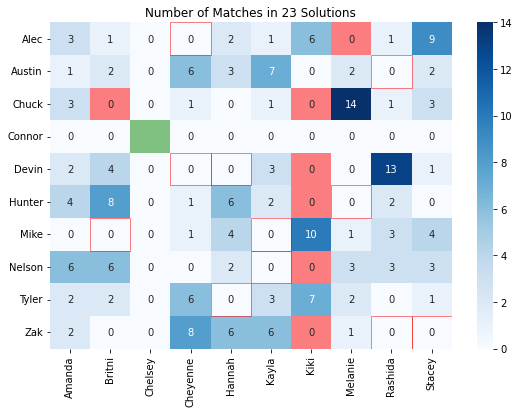

In [28]:
model.solve()
model.display()

# Week 9

In [29]:
model.add_truth_booth("Hunter", "Britni", False) 

In [30]:
model.solve()

<solutioncallbacks.MatchSolutionCounter; proxy of <Swig Object of type 'operations_research::sat::SolutionCallback *' at 0x13d2076f0> >

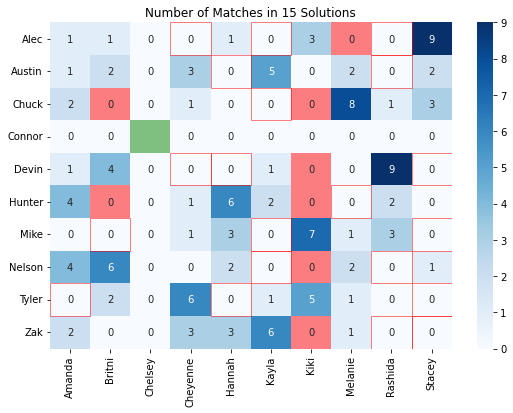

In [31]:
model.display()

In [32]:
matchups_w9 = [
    ("Alec", "Stacey"),
    ("Austin", "Cheyenne"),
    ("Chuck", "Rashida"),
    ("Connor", "Chelsey"),
    ("Devin", "Britni"),
    ("Hunter", "Kayla"),
    ("Mike", "Kiki"),
    ("Nelson", "Amanda"),
    ("Tyler", "Melanie"),
    ("Zak", "Hannah")
]
model.add_matching_ceremony(2, matchups_w9)

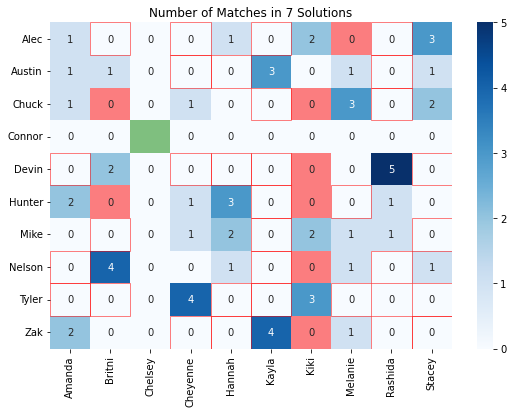

In [33]:
model.solve()
model.display()

# Week 10

In [34]:
model.min_expected_truth_booth([
    ("Tyler", "Melanie"),
    ("Devin", "Rashida"),
    ("Zak", "Kayla")
])

{('Tyler', 'Melanie'): 7.0, ('Devin', 'Rashida'): 4.142857142857143, ('Zak', 'Kayla'): 3.571428571428571}


('Zak', 'Kayla')

In [35]:
model.add_truth_booth("Zak", "Kayla", True)

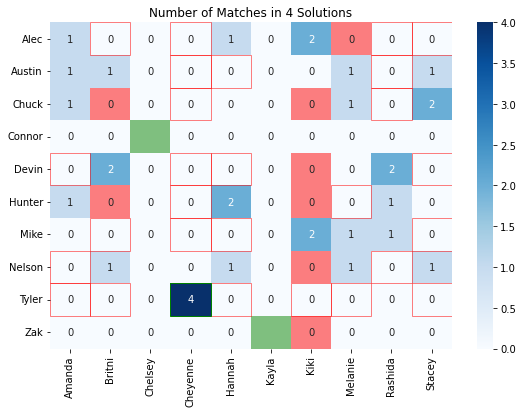

In [37]:
model.solve()
model.display()